In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive

 colabdata  'Colab Notebooks'  'research methodology slides'


In [4]:
!ls /content/drive/MyDrive/colabdata

chest_xray


In [5]:
!ls /content/drive/MyDrive/colabdata/chest_xray

chest_xray  __MACOSX  test  train  val


In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
base_dir = '/content/drive/MyDrive/colabdata/chest_xray'

train_normal = os.path.join(base_dir, 'train/NORMAL')
train_pneumonia = os.path.join(base_dir, 'train/PNEUMONIA')

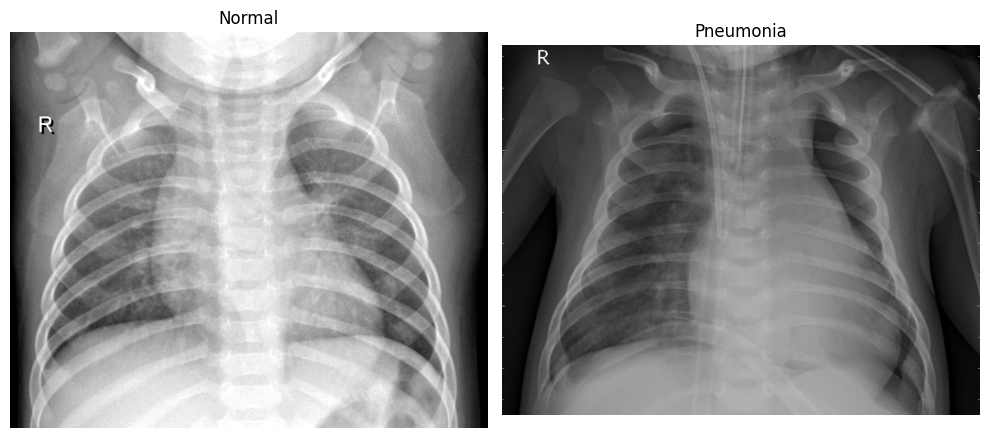

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Normal image
normal_img_path = os.path.join(train_normal, os.listdir(train_normal)[0])
normal_img = mpimg.imread(normal_img_path)
axes[0].imshow(normal_img, cmap='gray')
axes[0].set_title('Normal')
axes[0].axis('off')

# Pneumonia image
pneumonia_img_path = os.path.join(train_pneumonia, os.listdir(train_pneumonia)[0])
pneumonia_img = mpimg.imread(pneumonia_img_path)
axes[1].imshow(pneumonia_img, cmap='gray')
axes[1].set_title('Pneumonia')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# Image settings
img_size = 150  # you can change to 224 later if using bigger models
batch_size = 32

# Create image generators
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up train/val/test loaders
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale'
)

Found 5236 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [12]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # because it's binary: normal or pneumonia
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [14]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 640s 4s/step - accuracy: 0.7309 - loss: 0.5547 - val_accuracy: 0.8125 - val_loss: 0.5624
Epoch 2/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.8845 - loss: 0.2671 - val_accuracy: 0.5625 - val_loss: 1.3753
Epoch 3/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.9246 - loss: 0.2061 - val_accuracy: 0.7500 - val_loss: 0.5563
Epoch 4/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.9233 - loss: 0.1960 - val_accuracy: 0.6875 - val_loss: 0.7256
Epoch 5/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.9347 - loss: 0.1746 - val_accuracy: 0.7500 - val_loss: 0.5367
Epoch 6/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.9363 - loss: 0.1637 - val_accuracy: 0.6875 - val_loss: 0.7445
Epoch 7/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.9302 - loss: 0.1637 - val_accuracy: 0.8750 - val_loss: 0.3432
Epoch 8/10
164/164 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.9496 - loss: 0.1374 - val_accu

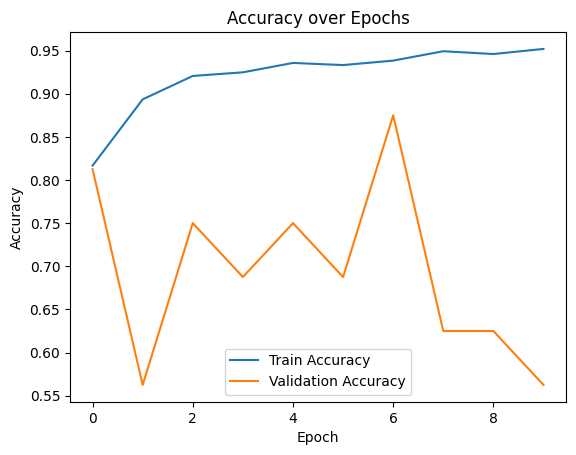

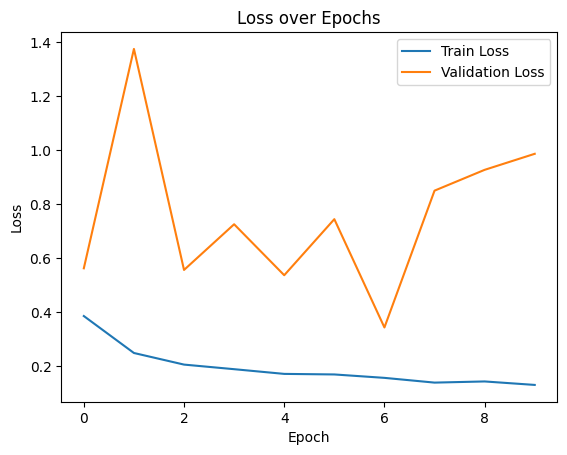

In [15]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 197s 10s/step - accuracy: 0.8504 - loss: 0.4842
Test Accuracy: 0.84
Test Loss: 0.48


In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [27]:
!ls /content/drive/MyDrive/colabdata/chest_xray/test/PNEUMONIA

person100_bacteria_475.jpeg  person142_bacteria_683.jpeg  person20_virus_51.jpeg
person100_bacteria_477.jpeg  person142_bacteria_684.jpeg  person21_virus_52.jpeg
person100_bacteria_478.jpeg  person143_bacteria_687.jpeg  person21_virus_53.jpeg
person100_bacteria_479.jpeg  person143_bacteria_688.jpeg  person22_virus_54.jpeg
person100_bacteria_480.jpeg  person143_bacteria_689.jpeg  person22_virus_55.jpeg
person100_bacteria_481.jpeg  person144_bacteria_690.jpeg  person23_virus_56.jpeg
person100_bacteria_482.jpeg  person145_bacteria_696.jpeg  person24_virus_58.jpeg
person101_bacteria_483.jpeg  person146_bacteria_700.jpeg  person25_virus_59.jpeg
person101_bacteria_484.jpeg  person146_bacteria_703.jpeg  person26_virus_60.jpeg
person101_bacteria_485.jpeg  person146_bacteria_704.jpeg  person28_virus_62.jpeg
person101_bacteria_486.jpeg  person147_bacteria_705.jpeg  person28_virus_63.jpeg
person102_bacteria_487.jpeg  person147_bacteria_706.jpeg  person29_virus_64.jpeg
person103_bacteria_488.jpeg 

In [30]:
img_path = '/content/drive/MyDrive/colabdata/chest_xray/test/PNEUMONIA/person140_bacteria_667.jpeg'

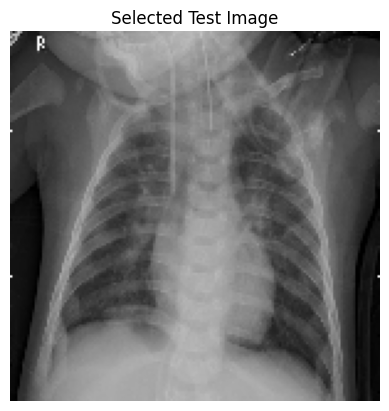

In [31]:
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/colabdata/chest_xray/test/PNEUMONIA/person140_bacteria_667.jpeg'
img = image.load_img(img_path, target_size=(150, 150), color_mode="grayscale")
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # normalize

plt.imshow(img_array[0].squeeze(), cmap='gray')
plt.title("Selected Test Image")
plt.axis('off')
plt.show()


In [39]:
_ = model.predict(img_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [40]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,827,905 (18.42 MB)

 Trainable params: 4,827,905 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
_ = model.predict(img_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [44]:
pred = model.predict(img_array)
print("Prediction:", "PNEUMONIA" if pred[0][0] > 0.5 else "NORMAL")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediction: PNEUMONIA


In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense

input_img = Input(shape=(150, 150, 1), name="input_layer")
x = Conv2D(32, (3,3), activation='relu', name="conv2d_1")(input_img)
x = MaxPooling2D(2,2)(x)
x = Conv2D(64, (3,3), activation='relu', name="conv2d_2")(x)
x = MaxPooling2D(2,2)(x)
x = Conv2D(128, (3,3), activation='relu', name="conv2d_3")(x)
x = MaxPooling2D(2,2)(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

final_model = Model(inputs=input_img, outputs=output)
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Activate model
_ = final_model.predict(img_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


conv_outputs shape: (128,)
grads shape: (34, 34, 128)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


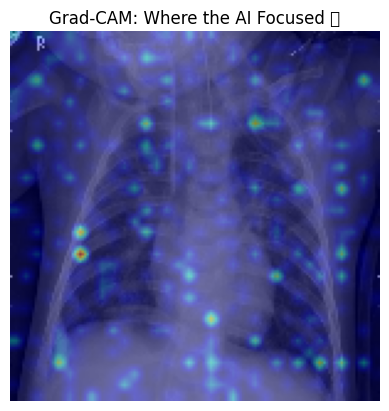

In [59]:
# Assume conv_outputs and grads are both already NumPy arrays with shape (H, W, C)

# Sanity check: print shapes
print("conv_outputs shape:", conv_outputs.shape)
print("grads shape:", grads.shape)

# Safely compute heatmap
if grads.ndim == 3 and conv_outputs.ndim == 3:
    pooled_grads = np.mean(grads, axis=(0, 1))
    for i in range(conv_outputs.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]
    heatmap = np.mean(conv_outputs, axis=-1)
else:
    # fallback if grads or conv_outputs is already 2D (no channels)
    heatmap = grads if grads.ndim == 2 else np.mean(grads, axis=-1)

# Normalize heatmap
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# Load original image
img_original = cv2.imread(img_path)
img_original = cv2.resize(img_original, (150, 150))

# Resize and overlay heatmap
heatmap_resized = cv2.resize(heatmap, (150, 150))
heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img_original, 0.6, heatmap_colored, 0.4, 0)

# Display final image
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.title("Grad-CAM: Where the AI Focused 🔥")
plt.axis('off')
plt.show()
